# Predictive Analysis of Employee Attrition and Performance
### Phase 1: Data Preparation & Visualisation
#### Group Number: 51
##### By Tanish Saajan s3940991

# Table of Contents

- [Introduction](#one)
    - [Phase 1 Summary](#two)
    - [Report Overview](#three)
    - [Overview of Methodology](#four)
- [Predictive Modelling](#five)
    - [Feature Selection (FS) ](#six)
    - [Model Fitting & Tuning](#seven)
    - [Neural Network Model Fitting & Tuning](#eight)
    - [Model Comparison](#nine)
- [Critique & Limitations ](#ten)
- [Summary & Conclusions](#eleven)
    - [Project Summary](#twelve)
    - [Summary of Findings](#thirteen)
    - [Conclusions](#fourteen)

# Introduction<a id="one"></a>

### Phase 1 Summary <a id="two"></a>

### Report Overview<a id="three"></a>

The Phase 2 report contains a thorough examination and analysis of the predictive modelling process used to explain employee attrition. This report is structured with various steps and methodologies applied, from feature selection to model evaluation and comparison. The sections of the report are organised as follows:

In this phase, we will convert the categorical features to numeric through One-Hot-Encoding and encode the target feature, considering the "yes" outcome as the positive class. Scaling the features is crucial to ensure that varying ranges in the descriptive features do not impact the model's predictive power. We will perform "Min-Max Scaling" for this purpose.

Following this, we proceed to core predictive modeling techniques, starting with "Feature Selection". This step is vital to avoid using all descriptive features, which could increase computational time and lead to overfitting. We will identify the top-10 features using Random Forest Importance and the F-Score method. After selecting the features, we will then split our data into training and test sets with a 70:30 ratio.

Next, we will focus on "Model Fitting and Tuning" to find the ideal hyperparameters for each algorithm using the selected features. The scoring metric will be roc_auc due to the binary and highly imbalanced nature of the classification problem. Additionally, we will fit and fine-tune a neural network algorithm using five different hyperparameters on the sampled dataset. The final step involves "Model Comparison", where we calculate AUC Scores via the cross_val_score method using paired t-tests to identify the best-performing algorithm. We will also consider confusion matrices and classification reports for a comprehensive evaluation.

The "Critique and Limitations" section will discuss the approach's limitations and potential solutions. The "Summary and Conclusions" section will summarize the entire project report, encompassing both Phase 1 and Phase 2, and highlight the findings. In the "Conclusions" section, we will reflect on our goals and objectives, presenting the end results of the report.

Note: Before utilizing any sklearn modules, we will convert our pandas DataFrame to a numpy array.

### Overview of Methodology<a id="four"></a>

Firstly to select the correct model for our problem begins with encoding the categorical features. Given that this is a classification problem, our target feature, Attrition, is also categorical. We will encode the target feature after splitting our main dataset into one for descriptive features and another for the target feature. For descriptive features with only two levels, we will use the pandas get_dummies() function to create one binary variable, while other categorical features will be encoded normally. Next, we will scale our data to normalize it, applying scaling only to the descriptive features dataset. Before scaling, we will save our original dataset to preserve column names, as the output of the MinMaxScaler function is a numpy array.

We then move on to core predictive modeling, starting with Feature Selection. Our goal is to identify the best 10 features using the Random Forest Importance method and the F-Score method. However, we will not use these 10 features throughout the entire modeling stage; instead, we will tune the hyperparameters of specific algorithms using different sets of features.

In the Model Fitting and Tuning stage, we will work with four different algorithms: K-Nearest Neighbors, Decision Tree, Naive Bayes, and Logistic Regression. We will tune their hyperparameters using their respective classifiers and the custom sourced class RFISelector() as part of the pipeline. A GridSearch approach with a 5-Fold Cross Validation technique will be used, without repetitions, using roc_auc as the scoring metric. We will then evaluate how each algorithm performs on the test data.

Additionally, we will undertake Neural Network Model Fitting and Tuning, attempting to tune seven hyperparameters.

The final stage of the predictive modeling process is Model Comparison. We will compare the models' performance using their cross-validation scores on the test data. Conclusions will be drawn by conducting paired t-tests (ensuring the same random state throughout for each model) to determine if the performance differences between various model combinations are statistically significant. Finally, we will reflect on our problem at hand and select the best model for deployment based on the classification report and confusion matrix.

## Data Preparation
### Dataset Retrieval

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
data1=pd.read_csv("Phase2.csv")
data1.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,Low,8,0,Bad,6,4,0,5
1,1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very High,10,3,Better,10,7,1,7
2,2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,7,3,Better,0,0,0,0
3,3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,8,3,Better,8,7,3,0
4,4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,Very High,6,3,Better,2,2,2,2


In [3]:
data1=data1.iloc[:,1:]
data1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,Low,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,Very High,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,Medium,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,1,Yes,11,Excellent,High,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,Very High,6,3,Better,2,2,2,2


# Predictive Modelling<a id="five"></a>

In [4]:
X=data1.drop(columns=["Attrition"])
y=data1["Attrition"]

### Encoding the Target Feature

In [5]:
y=y.replace({"Yes":1,"No":0})
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

We labeled the positive class "yes" as 1 and the negative class "no" as 0.The above count check confirms that our dataset is highly imbalanced. To address this during the data splitting stage, we will use stratification to maintain the class proportions in both the training and test sets.


Before encoding the descriptive features, we will review the data types assigned to each feature. If there are any mismatches, we will perform the necessary type conversions.

In [6]:
# Checking the data-type of each descriptive feature
X.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

The data types assigned to each descriptive feature are correct, with all categorical features having the data type 'object'. Thus, we can proceed with encoding these categorical features. Since all the categorical features are nominal, with no inherent ordering in their domain values, we do not need to differentiate between nominal and ordinal encoding. We can proceed with One-Hot-Encoding for all categorical features.

In [7]:
categorical= X.columns[X.dtypes==object].tolist()
categorical

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [8]:
for var in categorical:
    print(var)
    print(X[var].value_counts())
    print("----------------")

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------
Education
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
----------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------
EnvironmentSatisfaction
High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
----------------
Gender
Male      882
Female    588
Name: Gender, dtype: int64
----------------
JobInvolvement
High         868
Medium       375
Very High    144
Low           83
Name: JobInvolveme

### Encoding Categorical Features

Since our dataset includes categorical descriptive features, it is essential to encode them into numeric values before moving forward with the predictive modeling section. Additionally, because this is a classification problem, we need to encode the target feature as numeric.

In [9]:
for col in categorical:
    if (X[col].nunique() == 2):
        X[col] = pd.get_dummies(X[col], drop_first=True)
# Performing OHE for features with more than 2 levels
X = pd.get_dummies(X)
X.head()

,Age,DistanceFromHome,Gender,HourlyRate,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,0,94,2,5993,8,1,11,0,8,0,6,4,0,5,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
1,49,8,1,61,2,5130,1,0,23,1,10,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,37,2,1,92,1,2090,6,1,15,0,7,3,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,33,3,0,56,1,2909,1,1,11,0,8,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,27,2,1,40,1,3468,9,0,12,0,6,3,2,2,2,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0



We have completed the One-Hot-Encoding process for all categorical features. To verify, let's examine a sample of the modified data frame.

In [10]:
# Checking OHE for confirmation
X.sample(6, random_state=999)

,Age,DistanceFromHome,Gender,HourlyRate,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1237,32,1,1,34,2,6735,6,0,15,0,10,2,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1345,35,16,0,44,2,4788,0,1,11,0,4,2,3,2,0,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1174,25,2,1,77,2,5206,1,0,17,0,7,6,7,7,0,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
760,53,2,0,38,3,7525,2,0,12,0,30,2,15,7,6,12,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
139,30,9,1,48,2,6347,0,1,19,0,12,2,11,9,4,7,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
311,45,7,1,97,3,5210,1,0,18,0,24,2,24,9,9,11,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [11]:
X.shape

(1470, 65)

Following the One-Hot-Encoding process, our dataset now comprises a total of 65 columns. Deciding which columns to utilize and how many will be determined during the Hyperparameter Tuning stage.

### Scaling of Features
Before proceeding to the modeling phase, it's essential to normalize the dataset. This ensures that observations with varying variances don't impact the predictive power or the accuracy of the predictions. For this project, we'll employ the Min-Max Scaling method for normalization. It's worth noting that the fit_transform function used in this scaling method outputs a numpy array, resulting in the loss of column names. Therefore, we'll create a copy of our original dataframe beforehand to preserve this information.

In [12]:
# Storing a copy of the data-frame 
Data_df = X.copy()

In [13]:
from sklearn import preprocessing

Data_scaler = preprocessing.MinMaxScaler()

X_scaled = Data_scaler.fit_transform(Data_df)




In [14]:
# Confirming the output of the above scaling
pd.DataFrame(X_scaled, columns=Data_df.columns.tolist()).sample(10, random_state=999)


,Age,DistanceFromHome,Gender,HourlyRate,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1237,0.333333,0.000000,1.0,0.057143,0.25,0.301527,0.666667,0.0,0.285714,0.0,0.250,0.333333,0.000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1345,0.404762,0.535714,0.0,0.200000,0.25,0.198999,0.000000,1.0,0.000000,0.0,0.100,0.333333,0.075,0.111111,0.000000,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1174,0.166667,0.035714,1.0,0.671429,0.25,0.221011,0.111111,0.0,0.428571,0.0,0.175,1.000000,0.175,0.388889,0.000000,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
760,0.833333,0.035714,0.0,0.114286,0.50,0.343128,0.222222,0.0,0.071429,0.0,0.750,0.333333,0.375,0.388889,0.400000,0.705882,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
139,0.285714,0.285714,1.0,0.257143,0.25,0.281095,0.000000,1.0,0.571429,0.0,0.300,0.333333,0.275,0.500000,0.266667,0.411765,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
311,0.642857,0.214286,1.0,0.957143,0.50,0.221222,0.111111,0.0,0.500000,0.0,0.600,0.333333,0.600,0.500000,0.600000,0.647059,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
715,0.357143,0.000000,0.0,0.771429,0.25,0.235861,0.111111,1.0,0.142857,0.0,0.150,0.333333,0.150,0.277778,0.066667,0.117647,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
832,0.452381,0.857143,0.0,0.314286,0.25,0.248657,0.777778,0.0,0.142857,0.0,0.225,0.333333,0.150,0.111111,0.066667,0.176471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


The successful scaling of all descriptive features, except for the binary-level features, within the range of 0 and 1 indicates the completion of our Data Preparation stage. Now, we can move forward to Feature Selection.

# Predictive Modelling

### Feature Selection (FS)<a id="six"></a>

 Before proceeding with the Feature Selection and Ranking stage, it's essential to narrow down our features to the top 10. This approach helps mitigate the risk of overfitting that may arise when working with the complete set of features. In the Model Fitting and Tuning stage, we will fine-tune hyperparameters for each algorithm based on a specific number of features.

For Feature Selection and Ranking, we will utilize two methods:

  1. Random Forest Importance (Filter Method)
   2. F-Score (Filter Method)
    

### Random Forest Implication


In the initial stage of feature selection and ranking, we will utilize the Random Forest Importance method, which operates as a filter-based technique.

In [15]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=40)
model_rfi.fit(X_scaled, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['MonthlyIncome', 'Age', 'TotalWorkingYears', 'HourlyRate',
       'DistanceFromHome', 'OverTime', 'YearsAtCompany',
       'PercentSalaryHike', 'NumCompaniesWorked', 'YearsWithCurrManager'],
      dtype=object)

In [16]:
# Obtaining the importances of each features
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.07358353, 0.06283104, 0.05903025, 0.05314121, 0.04760127,
       0.0464222 , 0.04523239, 0.03591555, 0.0338698 , 0.03133511])

Plotting the best features for better representation

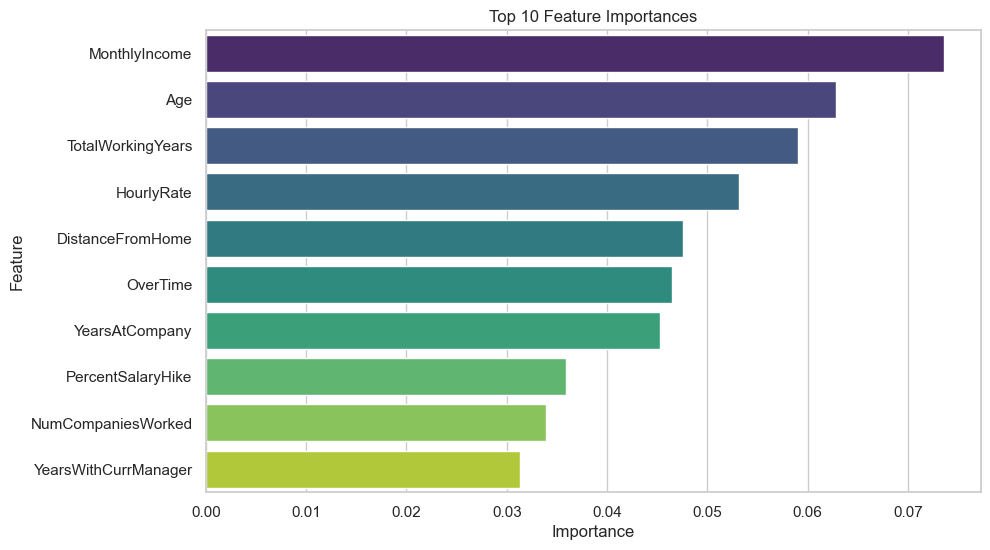

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
feature_importances_df = pd.DataFrame({
    'Feature': best_features_rfi,
    'Importance': feature_importances_rfi
})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances_df,
    palette='viridis'
)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()


We observe that the most important feature is OverMonthlyIncometime, followed by Age,DistanceFromHome and TotalWorkingYears.

### F-Score Implication

Similar to the Random Forest Importance method, the F-Score operates as a filter-based technique. It assigns an F-Score to each feature, sorted from highest to lowest based on their significance.

In [18]:
# Checking for F-Scores
from sklearn import feature_selection as fs

fit_fscore = fs.SelectKBest(fs.f_classif, k = num_features)
fit_fscore.fit_transform(X_scaled, y)
indices_fscore = np.argsort(np.nan_to_num(fit_fscore.scores_))[::-1][0:num_features]

print(f"Indices are {indices_fscore}")

top_features_fscore = Data_df.columns[indices_fscore].values
top_features_fscore

Indices are [ 7 56 10  4 13  5  0 49 15 12]


array(['OverTime', 'MaritalStatus_Single', 'TotalWorkingYears',
       'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age',
       'JobRole_Sales Representative', 'YearsWithCurrManager',
       'YearsAtCompany'], dtype=object)

In [19]:
# Getting the importances of the features
fscore_importance = fit_fscore.scores_[indices_fscore]
fscore_importance

array([94.65645707, 46.60698472, 44.25249144, 43.21534383, 38.83830278,
       38.48881898, 38.17588679, 37.21279754, 36.71231147, 27.00162376])

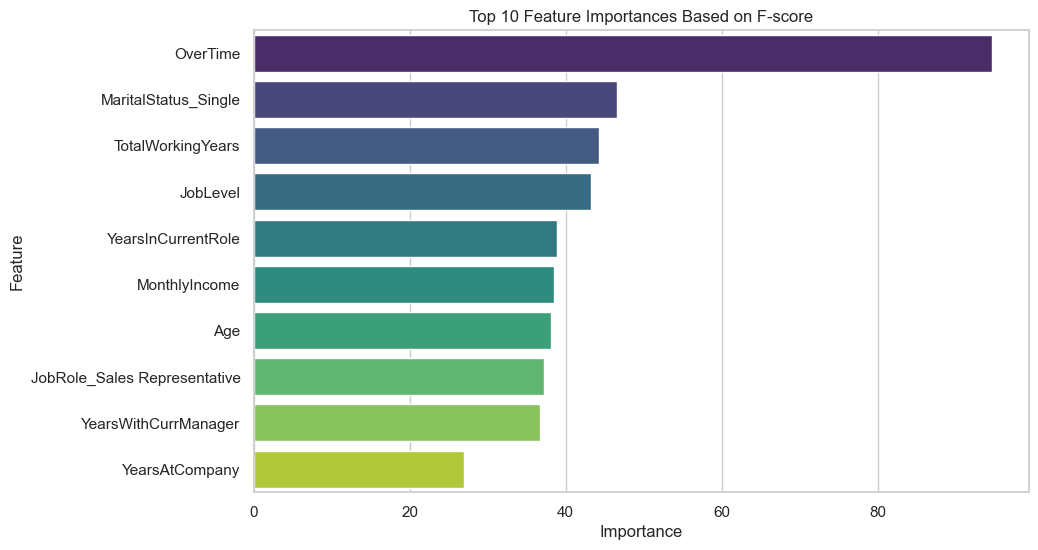

In [20]:
# Plotting the importances
fscore_importances_df = pd.DataFrame({
    'Feature': top_features_fscore,
    'Importance': fscore_importance
})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=fscore_importances_df,
    palette='viridis'
)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances Based on F-score')
plt.show()

We observe that the most important feature is Overtime, followed by MartialStatus_Single, TotalWorkingYears, and JobLevel

### Model Fitting and Tuning<a id=seven></a> 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999,stratify=y)
cv_method=StratifiedKFold(n_splits=5,shuffle=True,random_state=999)
print(X_train.shape)
print(X_test.shape)

(1029, 65)
(441, 65)


Based on the output above, our data has been successfully split into training and testing sets with a ratio of 70% for training and 30% for testing. Now, we can proceed with identifying the optimal hyperparameters for each model.

For hyperparameter tuning, we'll employ 5-fold cross-validation using the StratifiedKFold method. We'll refrain from repeating the process due to limitations of the current computational resources, as additional iterations would significantly increase the number of fits and computational time

#### K-Nearest Neighbors

For the K-Nearest Neighbors (KNN) algorithm, we have two key hyperparameters: k (the number of neighbors) and p (the type of distance metric). However, in addition to tuning these hyperparameters, we will also refine the number of features. Similar to our previous approach, where we used Random Forest Importance and F-Score for feature selection, we will incorporate these methods into the fine-tuning process. This will involve integrating Random Forest Importance (or SelectKBest) within a Pipeline, allowing us to select the optimal features alongside tuning hyperparameters.

We will execute these steps using 100 estimators. This approach will also be applied to the following models. As we are dealing with a binary classification problem that exhibits significant class imbalance, we will utilize roc_auc as the scoring metric. Alternatively, we could include class weights as a step in the pipeline to address the imbalance issue

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from numpy import argsort

# Creating a class for the Random Forest Classifier
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # Defining Constructors of the class
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None
        self.fs_importance_ = None
        
    # This overrides the 'fit' function
    def fit(self, X, y):
        model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        self.fs_importance_ = model_rfi.feature_importances_[self.fs_indices_ ]
        return self 
    
    # This overrides the 'transform' function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
pipe_knn=Pipeline(steps=[('rfi_fs', SelectKBest(score_func=f_classif)),
                   ('knn',KNeighborsClassifier())])
params_knn={'rfi_fs__k':[10,20,X_scaled.shape[1]],
           'knn__n_neighbors':[1,5,10,15,20],
           'knn__p':[1,2]}
gs_pipe_KNN = GridSearchCV(estimator=pipe_knn, 
                           param_grid=params_knn, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [27]:
gs_pipe_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', SelectKBest()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-2,
             param_grid={'knn__n_neighbors': [1, 5, 10, 15, 20],
                         'knn__p': [1, 2], 'rfi_fs__k': [10, 20, 65]},
             scoring='roc_auc', verbose=1)

In [28]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 10, 'knn__p': 1, 'rfi_fs__k': 65}

In [29]:
gs_pipe_KNN.best_score_

0.6669711125232701

From the outputs above, we can infer that the optimal KNN model has a mean `roc_auc` score of 0.66 approximately for 10 nearest neighbors, using the Manhattan Distance `p=1`, and 65 as the best number of features. 

As a good measure of statistic, we will also check other combinations of results via the following function. 


In [30]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [31]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__k
14,0.666971,0.029374,0.716238,0.635174,10.0,1.0,65.0
20,0.658963,0.034195,0.704852,0.619010,15.0,1.0,65.0
17,0.654541,0.035723,0.704502,0.603608,10.0,2.0,65.0
19,0.651436,0.039346,0.698984,0.590997,15.0,1.0,20.0
22,0.649476,0.031944,0.690927,0.594873,15.0,2.0,20.0


Based on the information provided in the DataFrame above, it appears that the 'best' combination does not exhibit significant differences from the other top 4 values. Next, we will proceed to visualize the results of the GridSearchCV using the number of features set to 30, as it was identified as the optimal number of features.

In [32]:
results_KNN_10_features = results_KNN[results_KNN['rfi_fs__k'] == 10.0]

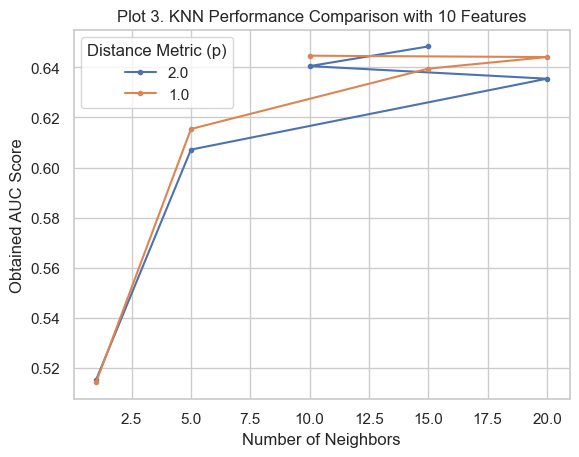

In [33]:
for i in results_KNN_10_features['knn__p'].unique():
    temp = results_KNN_10_features[results_KNN_10_features['knn__p'] == i]
    plt.plot(temp['knn__n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Distance Metric (p)")
plt.xlabel('Number of Neighbors')
plt.ylabel("Obtained AUC Score")
plt.title("Plot 3. KNN Performance Comparison with 10 Features")
plt.show()

We can observe from the above curve that the plot was still increasing, and 20 may not have had been the best number of nearest neighbors, we will re-run the above algorithm below as a repeat, with increased number of neighbors. 

After fitting the GridSearchCV, the results are extracted and organized into a DataFrame for analysis.

The focus is on examining the top 10 features selected by the RFI feature selection method and plotting the mean AUC scores for different KNN hyperparameters. The resulting plots illustrate the performance of the KNN classifier with varying numbers of neighbors and distance metrics, providing insights into the best configurations for the given dataset.

#### Decision Tree

We build a DT using gini index to maximize information gain. Our goal is to identify the optimal combinations of maximum depth (max_depth) and minimum sample split (min_samples_split).

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

pipe_dt = Pipeline([
    ('rfi_fs', SelectKBest(score_func=f_classif)), 
    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))  
])

param_dt = {
    'rfi_fs__k': [10, 20, X_scaled.shape[1]],  
    'dt__max_depth': [3, 5, 7,9],          
    'dt__min_samples_split': [2, 5,16]  
}

gs_pipe_dt = GridSearchCV(pipe_dt, param_grid=param_dt, n_jobs=1, cv=cv_method,
                          refit=True, scoring='roc_auc', verbose=1)

gs_pipe_dt.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', SelectKBest()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=999))]),
             n_jobs=1,
             param_grid={'dt__max_depth': [3, 5, 7, 9],
                         'dt__min_samples_split': [2, 5, 16],
                         'rfi_fs__k': [10, 20, 65]},
             scoring='roc_auc', verbose=1)

In [35]:
gs_pipe_dt.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 16, 'rfi_fs__k': 20}

In [36]:
gs_pipe_dt.best_score_

0.7455040419056573

The Decision Tree Classifier yielded a mean roc_auc of approximately 0.745, utilizing the optimal parameters: max_depth=5, min_samples_split=16, and employing 20 features.

To evaluate the significance of this result compared to other top values, we'll utilize the custom function get_search_results().

After fitting the GridSearchCV to the training data, a custom function is used to extract and compile the search results. This function processes the cross-validation results, calculating mean, standard deviation, minimum, and maximum scores for each parameter combination, and organizing them into a DataFrame for easy analysis

In [37]:
results_dt = get_search_results(gs_pipe_dt)
results_dt.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__k
16,0.745504,0.049554,0.805395,0.675337,5.0,16.0,20.0
25,0.736512,0.048803,0.807059,0.667367,7.0,16.0,20.0
34,0.727380,0.047038,0.799439,0.685409,9.0,16.0,20.0
13,0.721893,0.059884,0.802330,0.628569,5.0,5.0,20.0
2,0.711905,0.036081,0.765195,0.681025,3.0,2.0,65.0


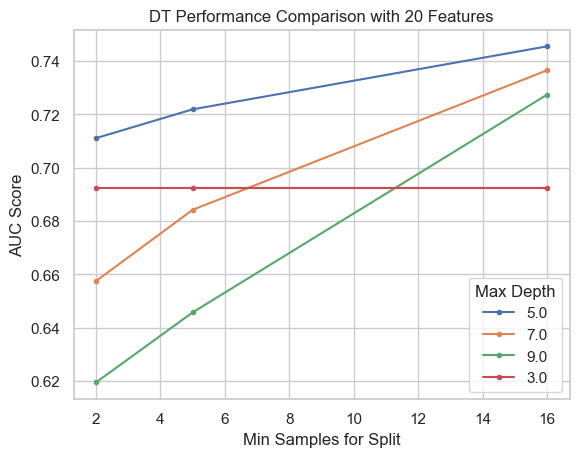

In [38]:
results_DT = get_search_results(gs_pipe_dt)
results_DT_10_features = results_DT[results_DT['rfi_fs__k'] == 20]


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 20 Features")
plt.show()


For max_depth = 5, the performance peaked at min_samples_split=5, indicating optimal performance. However, beyond this point, the algorithm's performance trends become less clear.

Moreover, the plot for max_depth=7 and 9 demonstrates a consistent increase in performance with an increasing number of splits, suggesting that a slightly higher min_samples_split may lead to a marginally better mean roc_auc score.



### Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8231292517006803

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
 
clf = RandomForestClassifier(random_state=42)
 
pipe_rf = Pipeline([
    ('rfi_fs', SelectKBest(score_func=f_classif)), 
    ('rf', clf)  
])
 
# Define the parameter grid
param_rf = {
    'rfi_fs__k': [5, 50, X_scaled.shape[1]],  
    'rf__n_estimators': [1,50, 100],          
    'rf__max_depth': [1,5, 10],          
    'rf__min_samples_split': [2, 5]  
}
 
# Create the GridSearchCV object
gs_pipe_rf = GridSearchCV(pipe_rf, param_grid=param_rf, n_jobs=1, cv=cv_method,
                          refit=True, scoring='roc_auc', verbose=1)
 
# Fit the GridSearchCV object
gs_pipe_rf.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', SelectKBest()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'rf__max_depth': [1, 5, 10],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [1, 50, 100],
                         'rfi_fs__k': [5, 50, 65]},
             scoring='roc_auc', verbose=1)

In [41]:
gs_pipe_rf.best_params_

{'rf__max_depth': 10,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 100,
 'rfi_fs__k': 50}

In [42]:
gs_pipe_rf.best_score_

0.8103019172693703

The Random Forest Classifier yielded a mean roc_auc of approximately 0.8123, utilizing the optimal parameters: max_depth=12, min_samples_split=5, and employing 65 features.

To evaluate the significance of this result compared to other top values, we'll utilize the custom function get_search_results().

In [43]:
results_rf = get_search_results(gs_pipe_rf)
results_rf.head()

,mean_score,std_score,max_score,min_score,rf__max_depth,rf__min_samples_split,rf__n_estimators,rfi_fs__k
52,0.810302,0.033372,0.860396,0.762141,10.0,5.0,100.0,50.0
53,0.809596,0.025652,0.842004,0.765903,10.0,5.0,100.0,65.0
25,0.806075,0.033571,0.850937,0.765856,5.0,2.0,100.0,50.0
31,0.805329,0.031945,0.856192,0.765152,5.0,5.0,50.0,50.0
43,0.805329,0.021045,0.836224,0.771846,10.0,2.0,100.0,50.0


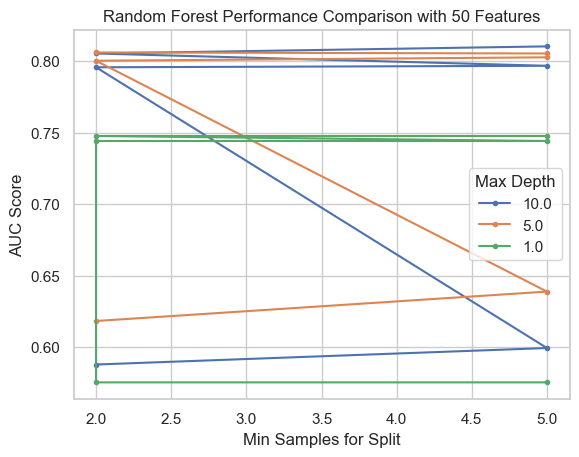

In [44]:
results_rf = get_search_results(gs_pipe_rf)
results_rf_20_features = results_rf[results_rf['rfi_fs__k'] == 50]

for i in results_rf_20_features['rf__max_depth'].unique():
    temp = results_rf_20_features[results_rf_20_features['rf__max_depth'] == i]
    plt.plot(temp['rf__min_samples_split'], temp['mean_score'], marker='.', label=i)
    
plt.legend(title="Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("Random Forest Performance Comparison with 50 Features")
plt.show()


For max_depth = 5 and 10, the performance peaked at min_samples_split=5, indicating optimal performance. However, beyond this point, the algorithm's performance trends become less clear.

Moreover, the plot for max_depth=7 and 9 demonstrates a consistent increase in performance with an increasing number of splits, suggesting that a slightly higher min_samples_split may lead to a marginally better mean roc_auc score.



###  Naive Bayes

To meet the assumption of the Naive Bayes Algorithm, which necessitates features to follow a normal distribution (a condition often not met in practice), we employ a power transformer. This transformation is applied to the input data before fitting the model, ensuring that the distribution of features adheres more closely to the normal distribution assumption required by the algorithm

In [45]:
from sklearn.preprocessing import PowerTransformer
X_train_transformed = PowerTransformer().fit_transform(X_train)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
import numpy as np

# Assuming you have the necessary data and preprocessing done
# X_train, X_test, y_train, y_test

# Create the pipeline
pipe_NB = Pipeline([
    ('rfi_fs', SelectKBest(score_func=f_classif)),
    ('nb', GaussianNB())
])

# Define the parameters for grid search
params_pipe_NB = {
    'rfi_fs__k': [10, 20, 30],  # Number of features to select
    'nb__var_smoothing': np.logspace(1, -3, num=80)  # Smoothing parameter
}

# Initialize GridSearchCV
gs_pipe_NB = GridSearchCV(
    estimator=pipe_NB,
    param_grid=params_pipe_NB,
    cv=cv_method,
    refit=True,
    n_jobs=-2,
    scoring='roc_auc',
    verbose=1
)

# Fit the pipeline
gs_pipe_NB.fit(X_train_transformed, y_train)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', SelectKBest()),
                                       ('nb', GaussianNB())]),
             n_jobs=-2,
             param_grid={'nb__var_smoothing': array([1.00000000e+01, 8.89953035e+00, 7.92016405e+00, 7.04857404e+00,
       6.27289986e+00, 5.58258627e+00, 4.96823959e+00, 4.42149991e+00,
       3.93492726e+00, 3.50190046e+00, 3.11...
       9.16273901e-03, 8.15440740e-03, 7.25703961e-03, 6.45842443e-03,
       5.74769442e-03, 5.11517810e-03, 4.55226828e-03, 4.05130497e-03,
       3.60547115e-03, 3.20870000e-03, 2.85559230e-03, 2.54134304e-03,
       2.26167595e-03, 2.01278538e-03, 1.79128445e-03, 1.59415904e-03,
       1.41872667e-03, 1.26260011e-03, 1.12365480e-03, 1.00000000e-03]),
                         'rfi_fs__k': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [47]:
gs_pipe_NB.best_params_

{'nb__var_smoothing': 8.899530352885229, 'rfi_fs__k': 30}

In [48]:
gs_pipe_NB.best_score_

0.7854727182151013

The optimal Naive Bayes Algorithm yields a `roc_auc` score of 0.785 approximately. Which is 2nd highest as compared to other alogorithms. Like we performed for the algorithms above, we will check the other top - 4 values as well. 

In [49]:
# Retrieving the other top-4 values
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,nb__var_smoothing,rfi_fs__k
5,0.785473,0.033560,0.842529,0.738714,8.899530,30.0
8,0.785331,0.033360,0.842004,0.738885,7.920164,30.0
2,0.785159,0.033783,0.842880,0.738201,10.000000,30.0
17,0.784880,0.033564,0.840953,0.738201,5.582586,30.0
14,0.784810,0.033712,0.841654,0.738372,6.272900,30.0


Similar to the other algorithms, we observe minimal variation in the mean_score values across the top-30 features. Let's proceed to visualize the results.

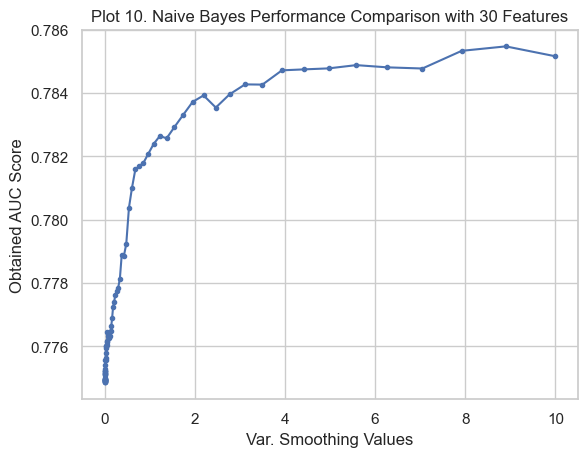

In [50]:
results_NB_30_features = results_NB[results_NB['rfi_fs__k'] == 30.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_30_features['nb__var_smoothing'], results_NB_30_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing Values')
plt.ylabel("Obtained AUC Score")
plt.title("Plot 10. Naive Bayes Performance Comparison with 30 Features")
plt.show()

From the plot, it's evident that the performance shows an exponential increase with the variation smoothing values.








### Logistic Regression model



While this algorithm doesn't have critical hyperparameters to tune, variations in performance can arise from different solvers. Regularization plays a vital role, achieved through penalty usage. However, not all penalties are supported by all solvers. Since 'l2' is the most common, it will be the focus of our tuning efforts.

In [51]:
Data_LR = X_scaled.copy()

In [59]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(Data_LR, y, test_size=0.2, random_state=42)
pipe_LR = Pipeline(steps=[
    ('rfi_fs', RFIFeatureSelector()),
    ('LR', LogisticRegression())
])


params_pipe_LR = {
    'rfi_fs__n_features_': [10, 20, 30],
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'LR__penalty': ['l2'],
    'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

gs_pipe_LR = GridSearchCV(estimator=pipe_LR, 
                           param_grid=params_pipe_LR, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [60]:
#  5-fold cross-validation
# Fetching the best parameters

gs_pipe_LR.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/tanishsaajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanishsaajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanishsaajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanishsaajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanishsaajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tanishsaajan/anaconda3/

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('rfi_fs', RFIFeatureSelector()),
                                       ('LR', LogisticRegression())]),
             n_jobs=-2,
             param_grid={'LR__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'LR__penalty': ['l2'],
                         'LR__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                        'saga'],
                         'rfi_fs__n_features_': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [62]:
gs_pipe_LR.best_params_

{'LR__C': 1,
 'LR__penalty': 'l2',
 'LR__solver': 'newton-cg',
 'rfi_fs__n_features_': 30}

In [63]:
# Fetching the best score 
gs_pipe_LR.best_score_

0.8406284667713239

It's worth noting that the Logistic Regression Classifier, like the Naive Bayes Algorithm, considered the top 20 features. With the solver set to 'liblinear', it yielded a mean roc_auc score of approximately 0.826, surpassing the score obtained by the other models. Let's now examine the other top observations.

In [64]:
results_LR = get_search_results(gs_pipe_LR)
results_LR.head()

,mean_score,std_score,max_score,min_score,LR__C,LR__penalty,LR__solver,rfi_fs__n_features_
41,0.840628,0.02308,0.865385,0.797959,1,l2,lbfgs,30
38,0.840628,0.02308,0.865385,0.797959,1,l2,newton-cg,30
47,0.840577,0.023174,0.865385,0.797704,1,l2,saga,30
50,0.840577,0.019482,0.864076,0.805102,10,l2,newton-cg,30
59,0.840576,0.019442,0.863946,0.805102,10,l2,saga,30


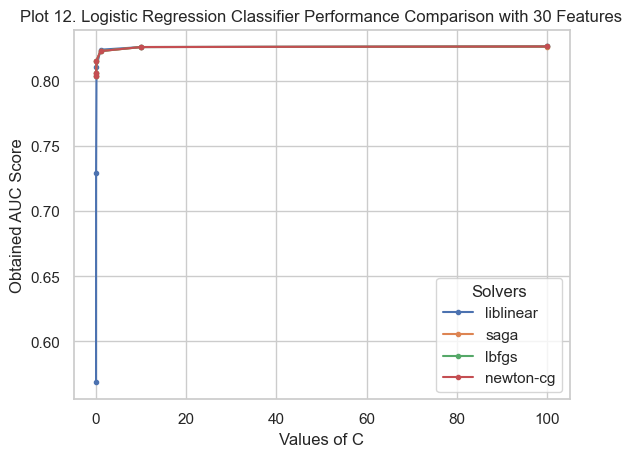

In [65]:
results_LR_30_features = results_LR[results_LR['rfi_fs__n_features_'] == 20.0].sort_values('LR__C')

# For loop to iterate over the different 'max_depth' values
for i in results_LR_30_features['LR__solver'].unique():
    temp = results_LR_30_features[results_LR_30_features['LR__solver'] == i]
    plt.plot(temp['LR__C'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Solvers")
plt.xlabel('Values of C')
plt.ylabel("Obtained AUC Score")
plt.title("Plot 12. Logistic Regression Classifier Performance Comparison with 30 Features")
plt.show()

We can clearly observe the elbow-shape on the curves, which depicts the constant performance after having reached the maximum performance at the value of C = 1.0

# Neural Network Model Fitting & Tuning<a id="eight"></a>


## Tash 2.2.5

#### Introduction

The aim of this part is to use Neural Networks for a binary classification. These models are inspired from human brains and work in a similar way to caputre intricate patterns in the data. 

* Model overview

We have used a sequential model using TensorFlow Keras, which is designed with multiple layers to ensure effective learning from the training data. The input data has been classified into two categories.

* Input layer - which has 128 neurons, it has been set to match the features in the data set. We also have ensured that the model has been introduced with non-linearity ( using ReLU) which will help the model to learn complex models. 

* Fisrt layer we have used 64 neurons, using ReLU, with batch normalisation which will improve the training speed and stability. Drop out rate of .5 is applied randomly to set the neurons to 0 which avoids overfitting. 

* Second layer comprises 32 neurons with ReLU activation, followed by batch normalization and a dropout rate of 0.5. The reduced number of neurons helps in gradually decreasing the complexity of the network.

* Output layer has a single neuron. 

#### Model parameters

* The activation functions used are ReLu and Sigmoid, to inrtoduce non linearity and to map prediction to probablities. 

* Batch normalisation applied after eah denser layer to standardise the inputs to the subsequent layers. 

* Dropout rates are 0.4 after the input layer, 0.5 after the 1st and 2nd hidden layers. 

* For optimizer used a learning rate of 0.001Used Adam optimizer.

* binary Crossentropy which is suitable for binary classifications is used as a loss function.

* Accuracy is used to compare model's performance after comparing the predicated labels with the true lables. 

In [66]:
data_NN = X_scaled.copy()

In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(data_NN, y, test_size=0.2, random_state=42)

# Define a function to create the model with configurable hyperparameters
def create_model(learning_rate=0.001, dropout_rate=0.5, num_neurons=128):
    model = Sequential()
    # Input layer and first hidden layer
    model.add(Dense(num_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # First hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


#### Fine tuningHyperparameters plots 

* 1st plot. 

We set the learning rates to 0.0001,0.001,0.01,0.1 

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    model = create_model(learning_rate=lr)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    histories[lr] = history

plt.figure(figsize=(14, 5))
for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'val_loss (lr={lr})')
plt.title('Validation Loss for Different Learning Rates')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In the graph above we can ovebserve the $0.001$ allowed the model to converge effeciently. This is the most optimal choice of the learning rate. 

* 2nd Plot

Here we keep the dropout rate 0.3, 0.4, 0.5, and 0.6.

In [ ]:
dropout_rates = [0.3, 0.4, 0.5, 0.6]
histories = {}

for dr in dropout_rates:
    model = create_model(dropout_rate=dr)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    histories[dr] = history

plt.figure(figsize=(14, 5))
for dr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'val_loss (dr={dr})')
plt.title('Validation Loss for Different Dropout Rates')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


We can oberve that $0.5$ provides a decent trade off, avoiding overfitting. 

* 3rd Plot

We change the batch size to 16, 32,64, 128. 

In [ ]:
batch_sizes = [16, 32, 64, 128]
histories = {}

for bs in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=bs, validation_data=(X_test, y_test))
    histories[bs] = history

plt.figure(figsize=(14, 5))
for bs, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'val_loss (bs={bs})')
plt.title('Validation Loss for Different Batch Sizes')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In the above plot batch sizes 16 and 32 seem to perform well. However, we think that $32$ is much smoother and more stable model. 

* Plot 4

Here we check with the number of neurons in the first layer. We use 32, 64, 128

In [ ]:
num_neurons_list = [32, 64, 128]
histories = {}

for nn in num_neurons_list:
    model = create_model(num_neurons=nn)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    histories[nn] = history

plt.figure(figsize=(14, 5))
for nn, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'val_loss (neurons={nn})')
plt.title('Validation Loss for Different Number of Neurons in the First Hidden Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


First layer with 32 showed the least capacity of the model, while $128$ showed the most capacity to understand complex models. 

* Plot 5

Experiment with training for 50, 100, 150, and 200 epochs

In [ ]:
epochs_list = [50, 100, 150, 200]
histories = {}

for epochs in epochs_list:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))
    histories[epochs] = history

plt.figure(figsize=(14, 5))
for epochs, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'val_loss (epochs={epochs})')
plt.title('Validation Loss for Different Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


We can obeserve that the loss from epoches $100$ is the lowest and is stable. We will use this over the others. 

##### We use all the best hyperparameters to make the model. 

* Learning Rate: 0.001 (based on optimal convergence)
* Dropout Rate: 0.5 (to prevent overfitting)
* Number of Neurons: 128 in the first hidden layer (to capture complex patterns)
* Epochs: 100 (sufficient for convergence)
* Batch Size: 32 (optimal for training dynamics)



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(data_NN, y, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model(learning_rate=0.001, dropout_rate=0.5, num_neurons=128):
    model = Sequential()
    # Input layer and first hidden layer
    model.add(Dense(num_neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    # First hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the final model
final_model = create_model(learning_rate=0.001, dropout_rate=0.5, num_neurons=128)

# Model summary
final_model.summary()

# Train the model
history = final_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Final model using all the best hyperparameters



* The model shows high training accuracy, reaching around 0.92. The validation accuracy is slightly lower but remains stable at around 0.88, indicating that the model generalizes well to unseen data.

* Good Generalization: The validation accuracy and loss curves indicate that the model is generalizing well and not overfitting significantly.

* Effective Learning: The steady decrease in training loss and increase in training accuracy show that the model is effectively learning from the training data.

* Selected Hyperparameters: The chosen hyperparameters (learning rate, dropout rate, number of neurons, epochs, and batch size) appear to have worked well together to create a robust and effective model.

# Model Comparison<a id="nine"></a>

In Machine Learning, Model Comparison stands as a pivotal step, aiming to identify the optimal model for our requirements and assess its performance upon deployment. Two key considerations in this evaluation process are how the data is partitioned and which metric is employed for assessment.

In our approach, we utilized a 5-Fold Cross-Validation technique across all algorithms. As for the evaluation metric, we selected roc_auc due to the nature of our classification problem, the binary target feature, and the presence of class imbalance. This metric aligns well with the characteristics of our problem.

To determine the best model, we employed paired t-tests, a statistical method. Before conducting these tests, we evaluated the performance of our algorithms using cross_val_score. This time, we opted for a 5-fold cross-validation with 2 repetitions for each tuned classifier. Following this evaluation, we proceeded with the statistical significance test on several combinations: KNN vs. DT, KNN vs. NB, KNN vs. LR, DT vs. NB, DT vs. LR, and NB vs. LR.

Finally, we calculated the mean cross_val_score for each classifier using their respective best estimators. This comprehensive approach allows us to make informed decisions about the most suitable model for our predictive task.

# Critique & Limitations <a id="ten"></a>


During preprocessing, we deliberately excluded the 'StandardHours' attribute from our analysis, as our primary goal was to predict outcomes without relying on the working hours of an employee. However, it's worth noting that some analysts might consider this attribute due to its significant influence on the target feature.

An advantage of our models is their ability to mitigate overfitting by selecting a subset of features. Although some degree of overfitting may still occur, it's significantly reduced compared to models using the complete feature set.

During hyperparameter tuning of our neural network model, we encountered an issue where computing roc_auc resulted in nan values. Consequently, we used accuracy as an alternative metric. If the model could track roc_auc loss during runtime, we could have compared its performance more effectively with other models.

Based on statistical tests and classification matrices, we identified the Logistic Regressor as the optimal model for our dataset. To further enhance its performance, additional hyperparameters such as 'max_iter' and 'class_weight' could be considered.

Consistently, the Naive Bayes model exhibited the lowest performance scores on training data, test data (without cross-validation), and roc_auc scores for ROC Curve plotting. This may be attributed to the power transformation applied, and the confusion matrix revealed evident issues with the 'zero frequency problem' for this dataset.

Since the Decision Tree emerged as the best model, a potential enhancement could involve fitting an ensemble model like the Random Forest Classifier, which might improve recall percentages.


# Summary & Conclusions <a id="eleven"></a>

    

## Project Summary<a id="twelve">
  

#### Phase 1
* We examined the data first for any inconsistencies. We removed some features with single unique values, feautures with columns that were not relavant to the task. We looked for any outliers in the data and missing values and did the required cleaning for them.

* We generated data visualizations to check the nature of the data, some trends observed were males having higher attrition rate than females, with employees from reseach department to stay more likely compared to the other departments.

#### Phase 2
* We started this part by feature selection, which we did using random forest and F- scores techniques, which helped us identify the most important or relavant features eg.  𝐴𝑔𝑒,  𝑂𝑣𝑒𝑟𝑡𝑖𝑚𝑒 etc

* After we split the data into training and testing sets (70 and 30 percent respectively). Using ML techniques like decision tree, KNN, Random forest, Naive Bayes, and Logistic Regression, we performed 5 fold stratified cross validation for hyperparameter testing.

* Neural Networks models were built using TensorFlow Keras. We fine tuned hyperparameters to check how the model performed under various constraints.

* At the end we did performance evaluation and compared the performance of the model.

## Summary of Findings<a id="thirteen"></a>
   

* OverTime: Employees working overtime showed a higher likelihood of attrition, suggesting that work-life balance is a critical factor.

* Monthly Income: Lower income levels were associated with higher attrition rates, indicating that salary is a significant factor in employee retention.

* Age: Younger employees (ages 30-40) had higher attrition rates, potentially due to career mobility or job dissatisfaction.

* Total Working Years: Employees with more years of experience showed higher attrition rates, possibly due to seeking better opportunities or dissatisfaction.

* Distance from Home: Longer commuting distances were correlated with higher attrition, emphasizing the importance of convenient workplace locations.

* Years at Company: Employees with fewer years at the company had higher attrition rates, suggesting challenges in early retention.

* Number of Companies Worked: Employees who worked at more companies before showed higher attrition rates, indicating job-hopping tendencies.

* Job Role and Department: Specific roles and departments, such as "Research and Development", had higher attrition rates, pointing to potential department-specific issue

# Conclusions <a id="fourteen"></a>

This project gives us effective predictive models, which can be used by the businesses to identify employees with high chances of attrition and can use various retention tactics to targeted towards these specofic employees. Understanding key factors related to attrition will allow the business and the HR team to formulate policies that will prevent or reduce this number in the business. As the business and the workplaces evolve, it will be essential to evaluate these models, to maintain their accuracy. This needs regular data updading and re-evaluating the features to adapt to new trends.